**классификатор изображений на основе VGG16**

Евгений Борисов <esborisov@sevsu.ru>

https://arxiv.org/pdf/1409.1556.pdf

In [1]:
from os import listdir
from os.path import join as pjoin

import numpy as np
from PIL import Image

from matplotlib import pyplot as plt

## модель

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import plot_model

In [3]:
from tabulate import tabulate
import tensorflow as tf
from tensorflow.test import is_built_with_cuda
from tensorflow.python.client.device_lib import list_local_devices

def tf_info(tablefmt='html'):
    res = [ ['tensorflow','%s'%(tf.__version__)],['keras','%s'%(tf.keras.__version__)] ]
    if is_built_with_cuda():
        res.extend( [ 
              [ s.strip().split(': ') for s in d.physical_device_desc.split(',')  ]
               for d in list_local_devices() 
              if d.device_type == 'GPU' # and d.name==tf.test.gpu_device_name()
            ][0] )
    else:
        res.append(['','no CUDA support'])
    return tabulate( res, tablefmt=tablefmt )

tf_info()


tensorflow,2.4.1
keras,2.4.0
device,0
name,NVIDIA GeForce GTX 1060 6GB
pci bus id,0000:01:00.0
compute capability,6.1


In [4]:
# !mkdir -p ../data/imagenet
# !wget -P ../data/imagenet -c https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5

# WEIGHTS_VGG16='data/imagenet/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# model = VGG16(weights=WEIGHTS_VGG16)

In [5]:
model = VGG16() # автозагрузка весов

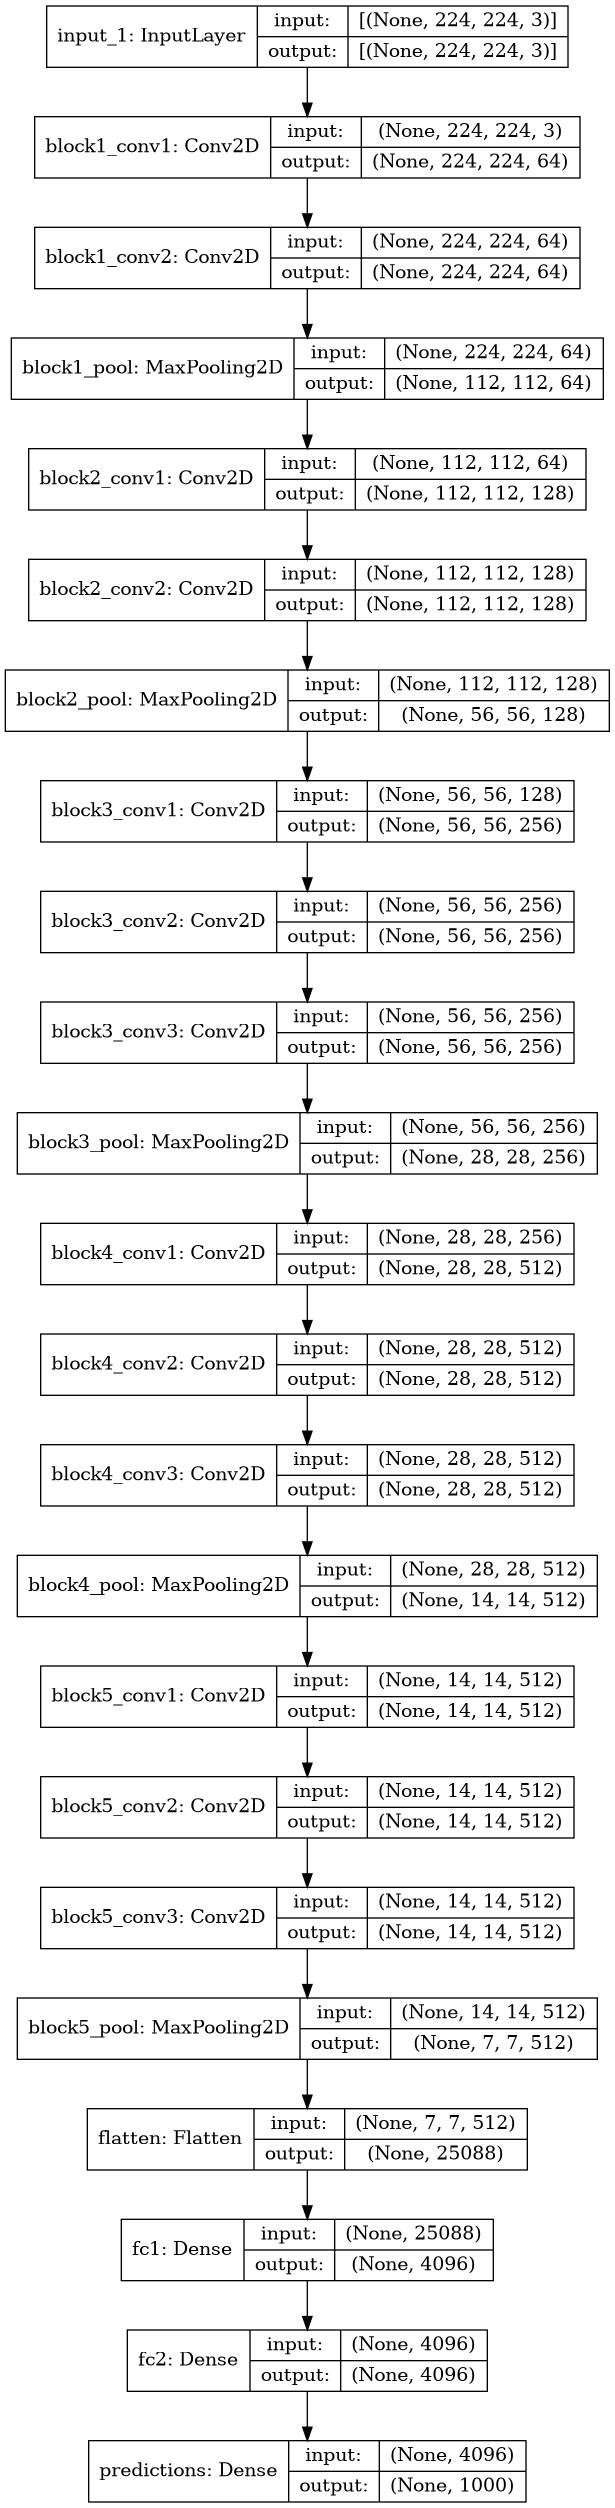

In [6]:
plot_model(model, to_file='vgg16.png', show_layer_names=True, show_shapes=True )

## тестируем

In [13]:
# !wget -P ../data/imagenet -c https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

In [11]:
fname_labels = '../data/imagenet/imagenet1000_clsidx_to_labels.txt'
with open(fname_labels, 'rt') as f: imagenet_labels = eval(f.read())

In [14]:
# http://www.image-net.org
    
IMAGE_PATH='../data/imagenet/photos/'
files = [ pjoin(IMAGE_PATH,f) for f in listdir(IMAGE_PATH) if f.lower().split('.')[-1]=='jpg' ]

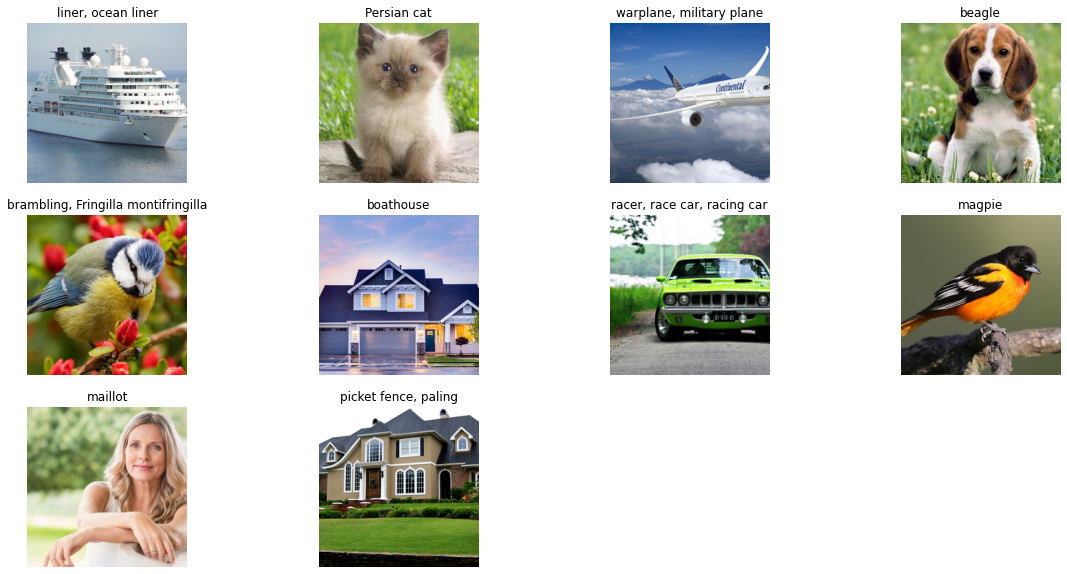

In [15]:
columns = 4

plt.figure(figsize=(20,10))

for n,f in enumerate(files):
    img = Image.open(f).resize([224,224,]) 
    X = np.array(img.convert('RGB')).astype(np.float32)[np.newaxis,:]
    r = model.predict(X)
    s = imagenet_labels[np.argmax(r)]

    plt.subplot( len(files)//columns+1, columns, n+1)
    plt.axis(False)
    plt.title(s)
    plt.imshow(img)

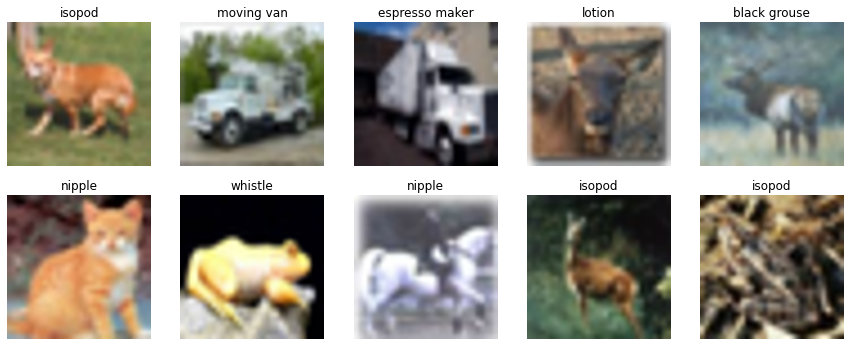

In [21]:
# Load and prepare the cifar10 dataset.
# https://www.cs.toronto.edu/~kriz/cifar.html 

_, (x_test, _) = tf.keras.datasets.cifar10.load_data()

columns = 5
n_samples = 10
ii = np.random.permutation(x_test.shape[0])[:n_samples]

plt.figure(figsize=(3*columns,3*(n_samples//columns+1)))

for n,x in enumerate(x_test[ii]):
    img = Image.fromarray(x).resize([224,224,]) 
    X = np.array(img.convert('RGB')).astype(np.float32)[np.newaxis,:]
    r = model.predict(X)
    s = imagenet_labels[np.argmax(r)]

    plt.subplot( n_samples//columns+1, columns, n+1)
    plt.axis(False)
    plt.title(s)
    plt.imshow(img)